In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
submission = pd.read_csv

df = train.copy()

In [56]:
train.shape, test.shape

((916, 12), (393, 11))

In [57]:
train.describe(include='all')

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
count,916.000000,916.000000,916.000000,916,916,736.000000,916.000000,916.000000,916,916.000000,198,915
unique,NaN,NaN,NaN,915,2,NaN,NaN,NaN,703,NaN,146,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,2,589,NaN,NaN,NaN,7,NaN,4,645
mean,457.500000,0.377729,2.292576,NaN,NaN,29.698370,0.507642,0.361354,NaN,32.402710,NaN,NaN
std,264.570721,0.485084,0.838675,NaN,NaN,14.185627,1.044866,0.828054,NaN,50.506411,NaN,NaN
min,0.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,228.750000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,457.500000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.458300,NaN,NaN
75%,686.250000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,30.017700,NaN,NaN


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  916 non-null    int64  
 1   survived     916 non-null    int64  
 2   pclass       916 non-null    int64  
 3   name         916 non-null    object 
 4   gender       916 non-null    object 
 5   age          736 non-null    float64
 6   sibsp        916 non-null    int64  
 7   parch        916 non-null    int64  
 8   ticket       916 non-null    object 
 9   fare         916 non-null    float64
 10  cabin        198 non-null    object 
 11  embarked     915 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 86.0+ KB


In [59]:
# 결측치 값을 넣어준다
train["age"] = train["age"].fillna(-0.5)
test["age"] = test["age"].fillna(-0.5)

bins = [-1,0,5,10,18,22,35,60, np.inf]
labels = ['unknown', 'baby','child', 'teenage', 'student', 'adult','middle age','senior']
train['age_group'] = pd.cut(train['age'],bins,labels= labels)
test['age_group'] = pd.cut(test['age'],bins,labels=labels)



In [60]:
combine = [train, test]

for dataset in combine:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand =False)
    
pd.crosstab(train['title'], train['gender'])
# crosstab (index, columns)

gender,female,male
title,,
Capt,0,1
Col,0,3
Countess,1,0
Don,0,1
Dr,1,4
Jonkheer,0,1
Major,0,2
Master,0,42
Miss,185,0


In [61]:
# 이름들은 하나의 이름으로 바꿔주기 
# mlle 결혼 안한 여성
for dataset in combine:
    dataset['title'] = dataset['title'].replace(['Lady', 'Capt', 'Col', 'Don',
                                                 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['title'] = dataset['title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['title'] = dataset['title'].replace('Mile', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].replace('Mlle', 'Mrs')


train[['title', 'survived']].groupby(['title'], as_index=False).mean()


,title,survived
0,Master,0.285714
1,Miss,0.806452
2,Mr,0.109848
3,Mrs,0.870504
4,Rare,0.157895
5,Royal,1.000000


In [62]:
title_mapping = {'Mr': 0 , 'Miss': 1, 'Mrs': 2, 'Master':3, 'Royal': 4, 'Rare': 5}
for dataset in combine:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)
    
train.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,age_group,title
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,-0.5,0,0,SC/PARIS 2159,12.8750,NaN,S,unknown,0
1,1,0,3,"Henry, Miss. Delia",female,-0.5,0,0,382649,7.7500,NaN,Q,unknown,1
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S,middle age,2
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,adult,0
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S,middle age,0


In [63]:
test['age_group']

0         teenage
1           adult
2         unknown
3         unknown
4      middle age
          ...    
388       unknown
389       teenage
390       teenage
391    middle age
392         adult
Name: age_group, Length: 393, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'student' < 'adult' < 'middle age' < 'senior']

In [64]:
# 각 title에서 어떤 값이 age_group에서 최빈값 나이인지를 확인
mr_age = train[train['title']==0]['age_group'].mode() # adult
miss_age = train[train['title']==1]['age_group'].mode() #adult
mrs_age = train[train['title']==2]['age_group'].mode() # middle age
master_age = train[train['title']==3]['age_group'].mode() # baby
royal_age = train[train['title']==4]['age_group'].mode() # middle age
rare_age = train[train['title']==5]['age_group'].mode() # middle age

age_title_mapping = {0: 'adult', 1: 'adult', 2:'middle age', 3: 'baby', 4: 'middle age',5: 'senior'}

for i in range(len(train['age_group'])):
    if train['age_group'][i] == 'unknown':
        train['age_group'][i] = age_title_mapping[train['title'][i]]
        
for i in range(len(test["age_group"])):
    if test["age_group"][i] == "unknown":
        test["age_group"][i] = age_title_mapping[test["title"][i]]
    

In [65]:
train[train['title']==0]['age_group'].mode() # Mr_age 의 최빈값을 확인 

0    adult
Name: age_group, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'student' < 'adult' < 'middle age' < 'senior']

In [66]:
test['age_group']

0         teenage
1           adult
2           adult
3           adult
4      middle age
          ...    
388         adult
389       teenage
390       teenage
391    middle age
392         adult
Name: age_group, Length: 393, dtype: category
Categories (8, object): ['unknown' < 'baby' < 'child' < 'teenage' < 'student' < 'adult' < 'middle age' < 'senior']

In [67]:
age_mapping = {'baby': 0 , 'child':1, 'teenage':2, 'student': 3, 'adult':4,
               'middle age': 5, 'senior':6}

train['age_group'] = train['age_group'].map(age_mapping)
test['age_group'] = test['age_group'].map(age_mapping)

train.drop(['age'],axis=1, inplace=True)
test.drop(['age'],axis=1, inplace=True)

train.drop(['name'],axis=1,inplace=True)
test.drop(['name'],axis=1, inplace=True)



In [68]:
test.isna().sum()

passengerid      0
pclass           0
gender           0
sibsp            0
parch            0
ticket           0
fare             1
cabin          296
embarked         1
age_group        0
title            0
dtype: int64

In [69]:
gender_mapping = {'male': 0 , 'female':1}

train['gender']=train['gender'].map(gender_mapping)
test['gender']=test['gender'].map(gender_mapping)

train['gender'].head()

0    0
1    1
2    1
3    0
4    0
Name: gender, dtype: int64

In [70]:
train['embarked'].value_counts()

S    645
C    189
Q     81
Name: embarked, dtype: int64

In [71]:
train['embarked']=train['embarked'].fillna('S')
test['embarked']=test['embarked'].fillna('S')



In [72]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}

train['embarked'] = train['embarked'].map(embarked_mapping)
test['embarked'] = test['embarked'].map(embarked_mapping)

train.head()

,passengerid,survived,pclass,gender,sibsp,parch,ticket,fare,cabin,embarked,age_group,title
0,0,0,2,0,0,0,SC/PARIS 2159,12.8750,NaN,0,4.0,0
1,1,0,3,1,0,0,382649,7.7500,NaN,2,4.0,1
2,2,1,1,1,1,1,12749,93.5000,B69,0,5.0,2
3,3,1,3,0,0,0,350043,7.7958,NaN,0,4.0,0
4,4,0,2,0,1,0,26707,26.0000,NaN,0,5.0,0


In [73]:
# fare의 넌값의 pclass 확인
test[test['fare'].isna()]

,passengerid,pclass,gender,sibsp,parch,ticket,fare,cabin,embarked,age_group,title
205,1121,3,0,0,0,3701,NaN,NaN,0,6.0,0


In [74]:
test.groupby('pclass').mean()['fare'] #653

pclass
1    96.407814
2    23.028414
3    12.690590
Name: fare, dtype: float64

In [75]:
# pclass 3의 평균값으로 넌 갚을 대체 
test['fare'].fillna({205:12.753299},inplace=True)

In [76]:
# sibsp 와 parch +1 을 한다면 가족을 구할 수 있음

train['family'] = train['sibsp'] + train['parch'] + 1
test['family'] = test['sibsp'] + test['parch'] + 1


<AxesSubplot:xlabel='family', ylabel='survived'>

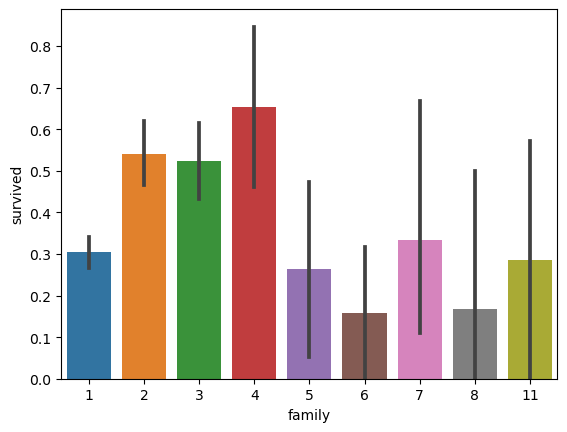

In [77]:
# 그래프를 보았을때 가족 구성원이 2~4명일때 생존률이 높고 1과 나머지는 생존이 힘든것을 확인
sns.barplot(data=train , x='family', y='survived')

In [78]:
bins = [0,1, np.inf]
labels = ['solo', 'family']
train['family'] = pd.cut(train['family'],bins,labels= labels)
test['family'] = pd.cut(test['family'],bins,labels=labels)

<AxesSubplot:xlabel='family', ylabel='survived'>

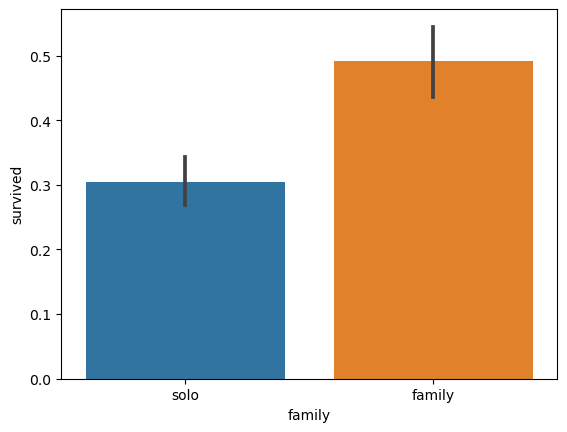

In [79]:
sns.barplot(data=train , x='family', y='survived')

In [80]:
family_mapping2 = {'solo': 0 , 'family':1 }

train['family'] = train['family'].map(family_mapping2)
test['family'] =test['family'].map(family_mapping2)
train.head()

,passengerid,survived,pclass,gender,sibsp,parch,ticket,fare,cabin,embarked,age_group,title,family
0,0,0,2,0,0,0,SC/PARIS 2159,12.8750,NaN,0,4.0,0,0
1,1,0,3,1,0,0,382649,7.7500,NaN,2,4.0,1,0
2,2,1,1,1,1,1,12749,93.5000,B69,0,5.0,2,1
3,3,1,3,0,0,0,350043,7.7958,NaN,0,4.0,0,0
4,4,0,2,0,1,0,26707,26.0000,NaN,0,5.0,0,1


In [81]:
train.drop(['cabin','ticket'],axis=1, inplace=True)
test.drop(['cabin','ticket'],axis=1, inplace=True)

In [82]:
enco_tr = pd.DataFrame()
enco_te = pd.DataFrame()

features_tr = train.drop(['passengerid'],axis=1)
features_te = test.drop(['passengerid'],axis=1)

cols_encoding = ['pclass','embarked','gender','family','sibsp','parch']
tmp_tr = train[cols_encoding]
tmp_te = test[cols_encoding]

enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)


In [83]:
enco_te.shape, enco_tr.shape

((0, 0), (0, 0))

# 인코딩(Onehot encoding)

In [84]:
#parch에 없는 값이 있음
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

# train = pd.get_dummies(data = train, columns=['pclass','embarked','gender','family','sibsp','parch'])
# test = pd.get_dummies(data = test, columns=['pclass','embarked','gender','family','sibsp','parch'])
encoder = ce.OneHotEncoder(use_cat_names=True)

for col in tmp_tr.columns:
  _enco = encoder.fit_transform(tmp_tr[col].astype('category'))
  enco_tr = pd.concat([enco_tr, _enco], axis=1)

  _enco = encoder.transform(tmp_te[col].astype('category'))
  enco_te = pd.concat([enco_te, _enco], axis=1)

print(f'{enco_tr.shape} / {enco_te.shape}')
enco_tr.head()

(916, 25) / (393, 25)


,pclass_2.0,pclass_3.0,pclass_1.0,embarked_0.0,embarked_2.0,embarked_1.0,gender_0.0,gender_1.0,family_0.0,family_1.0,...,sibsp_2.0,sibsp_4.0,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_6.0,parch_5.0,parch_9.0
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [85]:
features_tr = features_tr.reset_index(drop=True)
features_te = features_te.reset_index(drop=True)
enco_tr = enco_tr.reset_index(drop=True)
enco_te = enco_te.reset_index(drop=True)

features_tr.shape, enco_tr.shape

((916, 10), (916, 25))

In [86]:
df_tr = pd.concat([features_tr,enco_tr],axis=1).reset_index(drop=True)
df_te = pd.concat([features_te,enco_te],axis=1).reset_index(drop=True)

df_tr.head()

,survived,pclass,gender,sibsp,parch,fare,embarked,age_group,title,family,...,sibsp_2.0,sibsp_4.0,parch_0.0,parch_1.0,parch_2.0,parch_3.0,parch_4.0,parch_6.0,parch_5.0,parch_9.0
0,0,2,0,0,0,12.8750,0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,3,1,0,0,7.7500,2,4.0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,93.5000,0,5.0,2,1,...,0,0,0,1,0,0,0,0,0,0
3,1,3,0,0,0,7.7958,0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2,0,1,0,26.0000,0,5.0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [87]:
df_tr.drop(['pclass','gender','sibsp','parch','embarked','family'],axis=1 ,inplace=True)

df_te.drop(['pclass','gender','sibsp','parch','embarked','family'],axis=1 ,inplace=True)

# Heatmap

<AxesSubplot:>

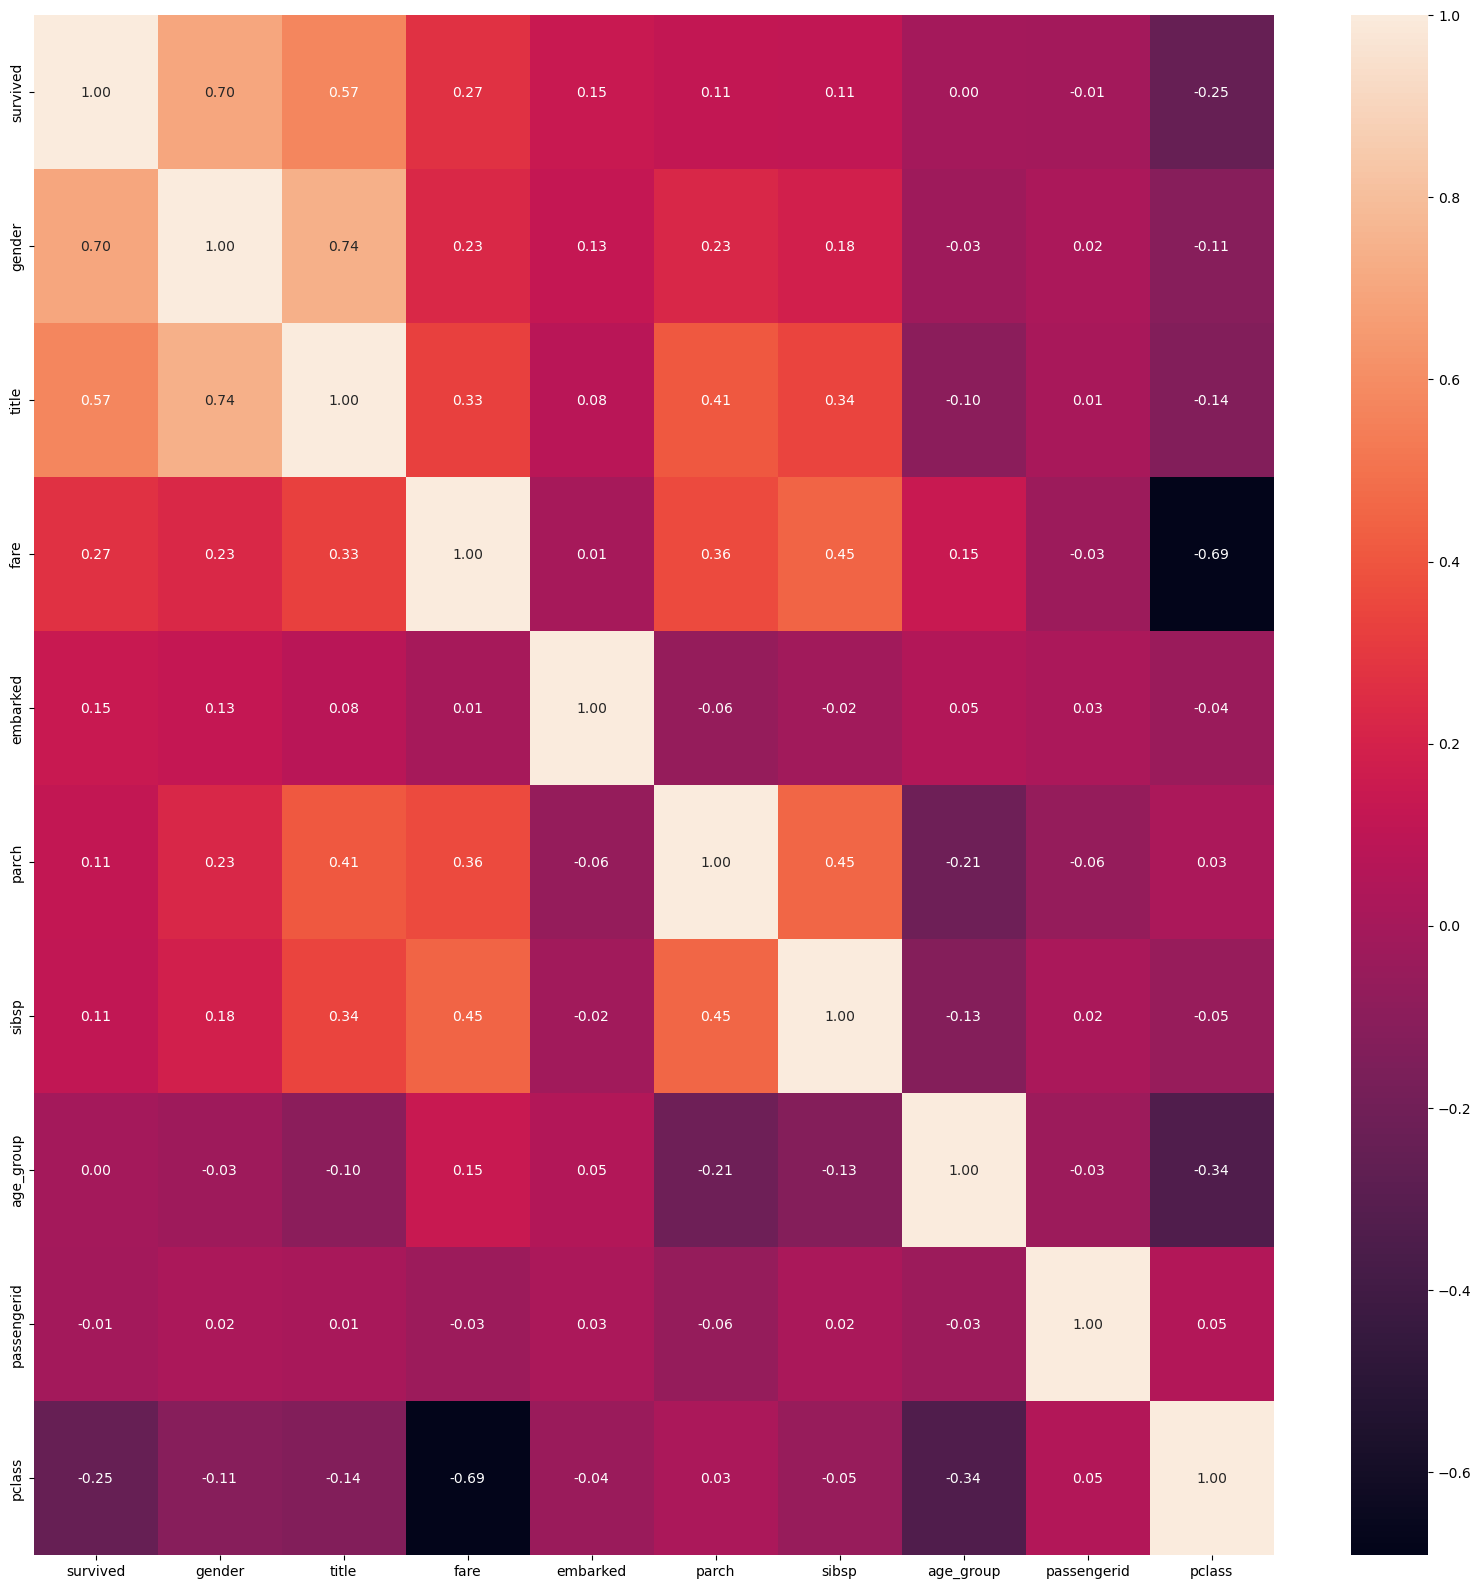

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (20,20))
corrmat = train.corr(method='spearman')
indexes = corrmat.nlargest(n=50, columns='survived').index
corrmat = train[indexes].corr(method='spearman')
sns.heatmap(data=corrmat, annot=True, cbar=True, fmt='.2f', ax=ax)

In [89]:
df_tr['gender1fare'] = df_tr['gender_1.0'] * df_tr['fare']
df_te['gender1fare'] = df_te['gender_1.0'] * df_te['fare']

df_tr['gen0fare'] = df_tr['gender_0.0'] * df_tr['fare']
df_te['gen0fare'] = df_te['gender_0.0'] * df_te['fare']

df_tr['gen1cl1'] = df_tr['gender_1.0'] * df_tr['pclass_1.0']
df_te['gen1cl1'] = df_te['gender_1.0'] * df_te['pclass_1.0']

df_tr['gen1cl3'] = df_tr['gender_1.0'] * df_tr['pclass_3.0']
df_te['gen1cl3'] = df_te['gender_1.0'] * df_te['pclass_3.0']

df_tr['gen0cl1'] = df_tr['gender_0.0'] * df_tr['pclass_1.0']
df_te['gen0cl1'] = df_te['gender_0.0'] * df_te['pclass_1.0']

df_tr['gen0cl3'] = df_tr['gender_0.0'] * df_tr['pclass_3.0']
df_te['gen0cl3'] = df_te['gender_0.0'] * df_te['pclass_3.0']




In [90]:
df_tr

,survived,fare,age_group,title,pclass_2.0,pclass_3.0,pclass_1.0,embarked_0.0,embarked_2.0,embarked_1.0,...,parch_4.0,parch_6.0,parch_5.0,parch_9.0,gender1fare,gen0fare,gen1cl1,gen1cl3,gen0cl1,gen0cl3
0,0,12.8750,4.0,0,1,0,0,1,0,0,...,0,0,0,0,0.0000,12.8750,0,0,0,0
1,0,7.7500,4.0,1,0,1,0,0,1,0,...,0,0,0,0,7.7500,0.0000,0,1,0,0
2,1,93.5000,5.0,2,0,0,1,1,0,0,...,0,0,0,0,93.5000,0.0000,1,0,0,0
3,1,7.7958,4.0,0,0,1,0,1,0,0,...,0,0,0,0,0.0000,7.7958,0,0,0,1
4,0,26.0000,5.0,0,1,0,0,1,0,0,...,0,0,0,0,0.0000,26.0000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,6.4375,4.0,0,0,1,0,0,0,1,...,0,0,0,0,0.0000,6.4375,0,0,0,1
912,0,8.6625,2.0,0,0,1,0,1,0,0,...,0,0,0,0,0.0000,8.6625,0,0,0,1
913,0,10.5000,3.0,0,1,0,0,1,0,0,...,0,0,0,0,0.0000,10.5000,0,0,0,0
914,1,7.7333,4.0,1,0,1,0,0,1,0,...,0,0,0,0,7.7333,0.0000,0,1,0,0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

predictors = df_tr.drop(['survived'], axis =1)
target = df_tr["survived"]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state =42)

In [92]:
from sklearn.linear_model import LogisticRegression

Logistic_model = LogisticRegression()

Logistic_model.fit(X_train,y_train)
y_pred = Logistic_model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8763636363636363

# 혼동행렬(confusion_matrix)

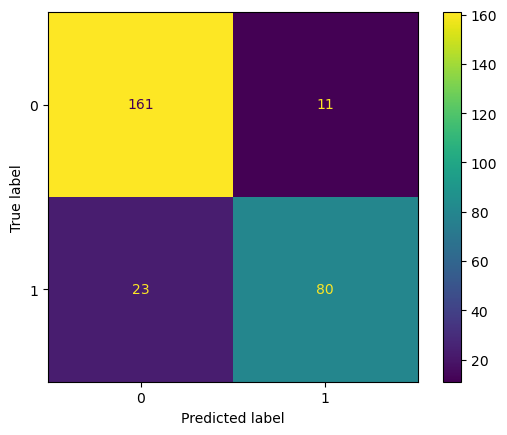

In [93]:
plot_confusion_matrix(Logistic_model, X_test, y_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)
dtcpred = dtc.predict(X_test)


dtc_score = accuracy_score(dtcpred, y_test)
dtc_score

0.8218181818181818

In [95]:
from lightgbm import LGBMRegressor, LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
preds = lgbm.predict(X_test)


lgbm.score(X_train,y_train) , lgbm.score(X_test,y_test)

(0.9391575663026521, 0.8581818181818182)

In [96]:
X_train.shape, X_test.shape, test.shape

((641, 34), (275, 34), (393, 10))

In [97]:
lgbm_score = accuracy_score(preds, y_test)
lgbm_score

0.8581818181818182

In [98]:
from sklearn.metrics import roc_curve, auc

predrf = lgbm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, predrf)

auc(fpr, tpr)

0.8860069993226463

In [99]:
test.set_index(['passengerid'], inplace=True)  

print(f'{test.shape}')
test.head()

(393, 9)


,pclass,gender,sibsp,parch,fare,embarked,age_group,title,family
passengerid,,,,,,,,,
916,3,1,0,0,8.0292,2,2.0,1,0
917,2,1,0,0,13.0000,0,4.0,2,0
918,3,1,0,0,7.7500,2,4.0,1,0
919,3,0,0,0,7.2500,0,4.0,0,0
920,1,1,1,1,164.8667,0,5.0,2,1


In [100]:
submission = pd.read_csv('./submission.csv')
test_pred = lgbm.predict_proba(df_te)

In [101]:
submission = pd.read_csv('./submission.csv')
test_pred = lgbm.predict_proba(df_te)[:, 1]
submission['survived'] = test_pred
submission.to_csv('sample_submission.csv', header=True, index=False)

# Feature importance

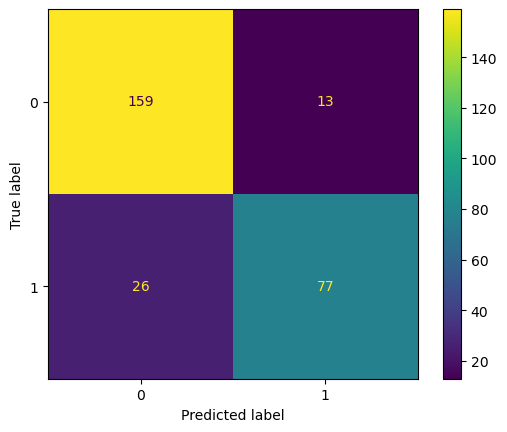

In [102]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# confusion matrix plotting
cm = confusion_matrix(y_test, preds, labels=lgbm.classes_)
# labelling
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()
plt.show()

### 파라미터 튜닝

In [103]:
# import lightgbm as lgb
# import optuna
# from sklearn.model_selection import train_test_split
# import sklearn
# 
# 
# import optuna
# def objective(trial):
#     dtrain = lgb.Dataset(X_train, label=y_train)
# 
#     param = {
#         'objective': 'binary', # 회귀
#         'verbose': -1,
#         'metric': 'rmse', 
#         'max_depth': trial.suggest_int('max_depth',3, 15),
#         'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
#         'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
#     }
#     gbm = lgb.train(param, dtrain)
#     preds = gbm.predict(X_test)
#     pred_labels = np.rint(preds)
#     accuracy = sklearn.metrics.accuracy_score(y_test, pred_labels)
#     return accuracy

In [104]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=200)

In [105]:

# print("Number of finished trials: {}".format(len(study.trials)))print("Best trial:")
# trial = study.best_trial
# 
# print("  Value: {}".format(trial.value))
# 
# print("  Params: ")
# for key, value in trial.params.items():
# 
#     print("    {}: {}".format(key, value))

# Feature importance

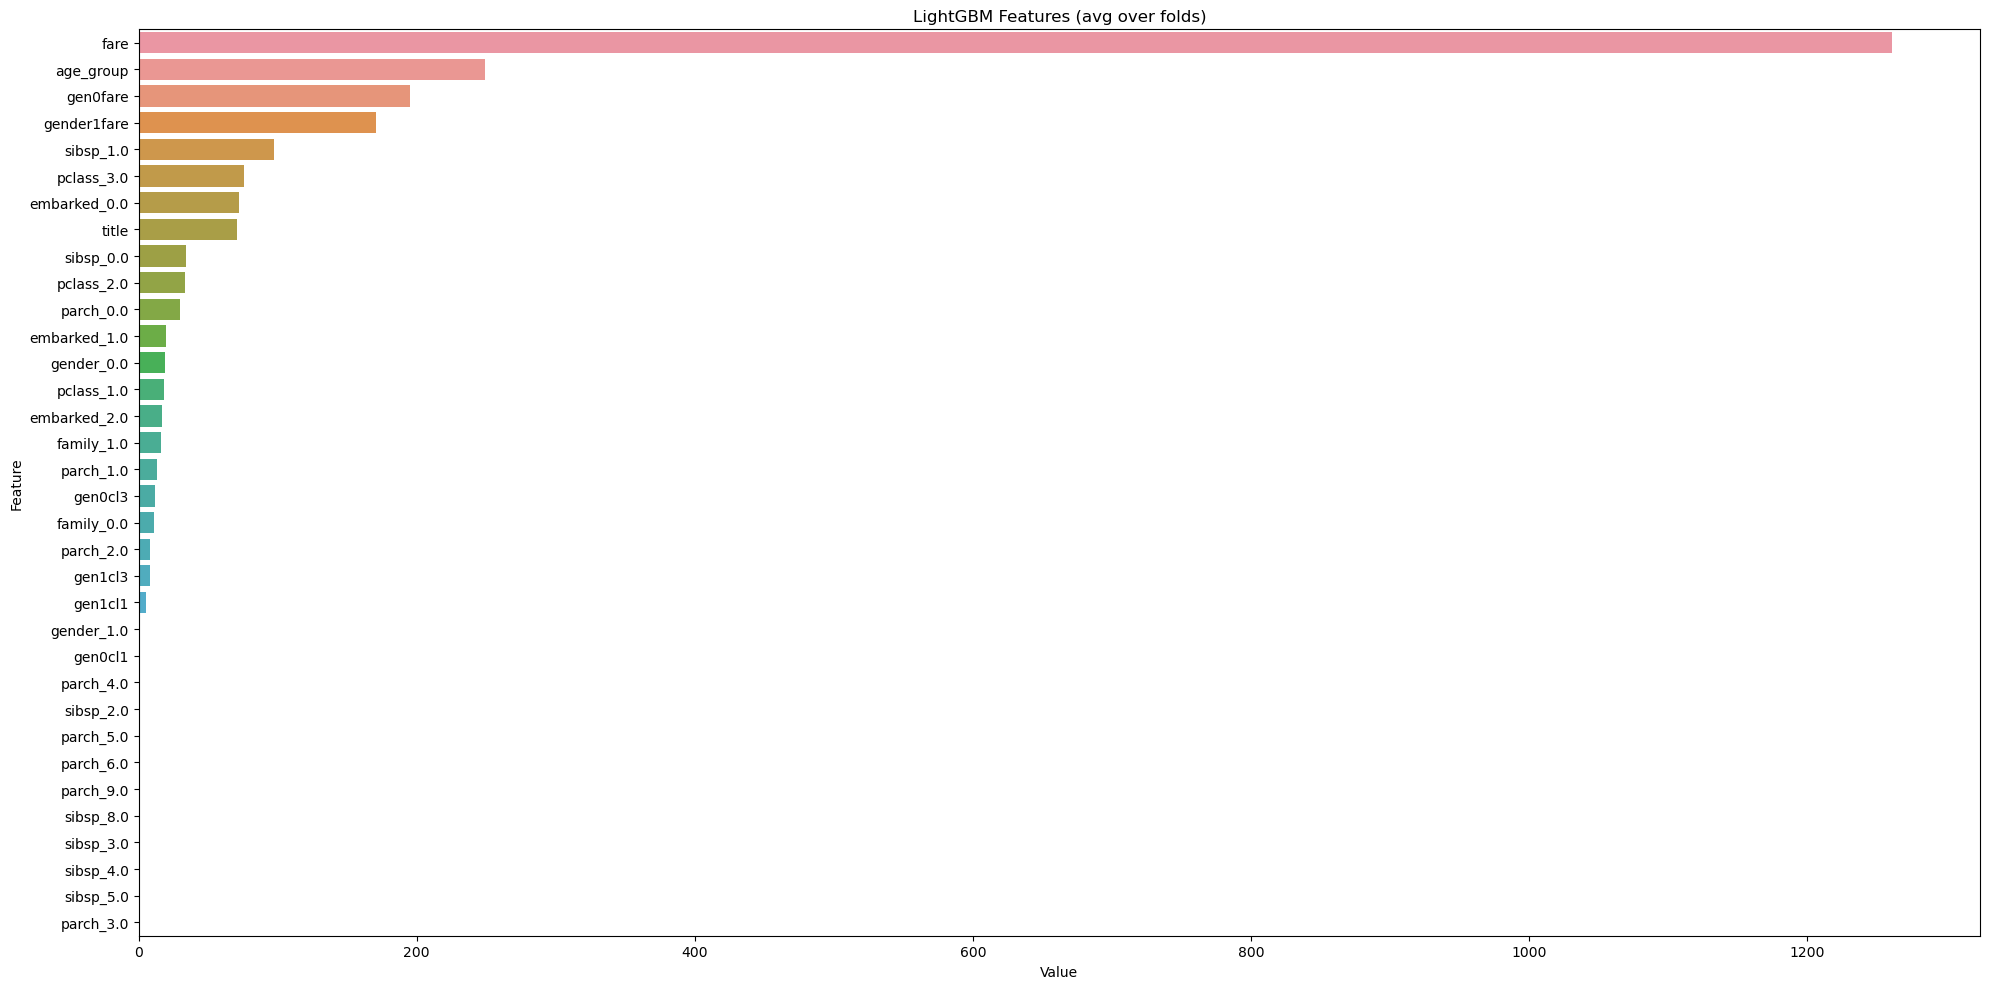

<Figure size 640x480 with 0 Axes>

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')